In [1]:
import o3fire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
merged_df = pd.read_csv("/home/jpalmo/fs09/Projects/O3Fire/model_eval/output/model_obs_2025.4.16.csv")

/tmp/ipykernel_105140/730740274.py:1: DtypeWarning: Columns (240,242) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("/home/jpalmo/fs09/Projects/O3Fire/model_eval/output/model_obs_2025.4.16.csv")


In [3]:
merged_df['NOx_model'] = merged_df['NO_model'] + merged_df['NO2_model']
merged_df['NOx_nested_model'] = merged_df['NO_nested_model'] + merged_df['NO2_nested_model']

In [ ]:
### reverse engineer the background based on the processed data

In [11]:
merged_df['O3_baseline'] = merged_df['O3_model'] - merged_df['O3_delta_campaignsplit_model']
merged_df['NOx_baseline'] = merged_df['NOx_model'] - merged_df['NOx_delta_campaignsplit_model']
merged_df['CO_baseline'] = merged_df['CO_model'] - merged_df['CO_delta_campaignsplit_model']

In [13]:
other_df = merged_df[(merged_df['campaign']!='ATom')&(merged_df['lat']<49)]
atom_df = merged_df[merged_df['campaign']=='ATom']
arctas_df = merged_df[(merged_df['campaign'] == 'ARCTAS')&(merged_df['lat'] > 49)]

In [14]:
troposphere_alt_bins = np.array([0, 2, 4, 6, 8, 10, 12])*1000
troposphere_alt_ranges = troposphere_alt_bins[0:-1]
troposphere_alt_ranges = troposphere_alt_ranges + 1000

In [17]:
atom_df['alt_range'] =  pd.cut(atom_df['altitude'], troposphere_alt_bins)
atom_model_trop_baseline = atom_df.groupby('alt_range')['O3_baseline', 'NOx_baseline', 'CO_baseline'].mean().reset_index()

other_df['alt_range'] =  pd.cut(other_df['altitude'], troposphere_alt_bins)
other_model_trop_baseline = other_df.groupby('alt_range')['O3_baseline', 'NOx_baseline', 'CO_baseline'].mean().reset_index()

arctas_df['alt_range'] =  pd.cut(arctas_df['altitude'], troposphere_alt_bins)
arctas_model_trop_baseline = arctas_df.groupby('alt_range')['O3_baseline', 'NOx_baseline', 'CO_baseline'].mean().reset_index()

/tmp/ipykernel_105140/2440830096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atom_df['alt_range'] =  pd.cut(atom_df['altitude'], troposphere_alt_bins)
/tmp/ipykernel_105140/2440830096.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  atom_model_trop_baseline = atom_df.groupby('alt_range')['O3_baseline', 'NOx_baseline', 'CO_baseline'].mean().reset_index()
/tmp/ipykernel_105140/2440830096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

# Plot

### Figure S3

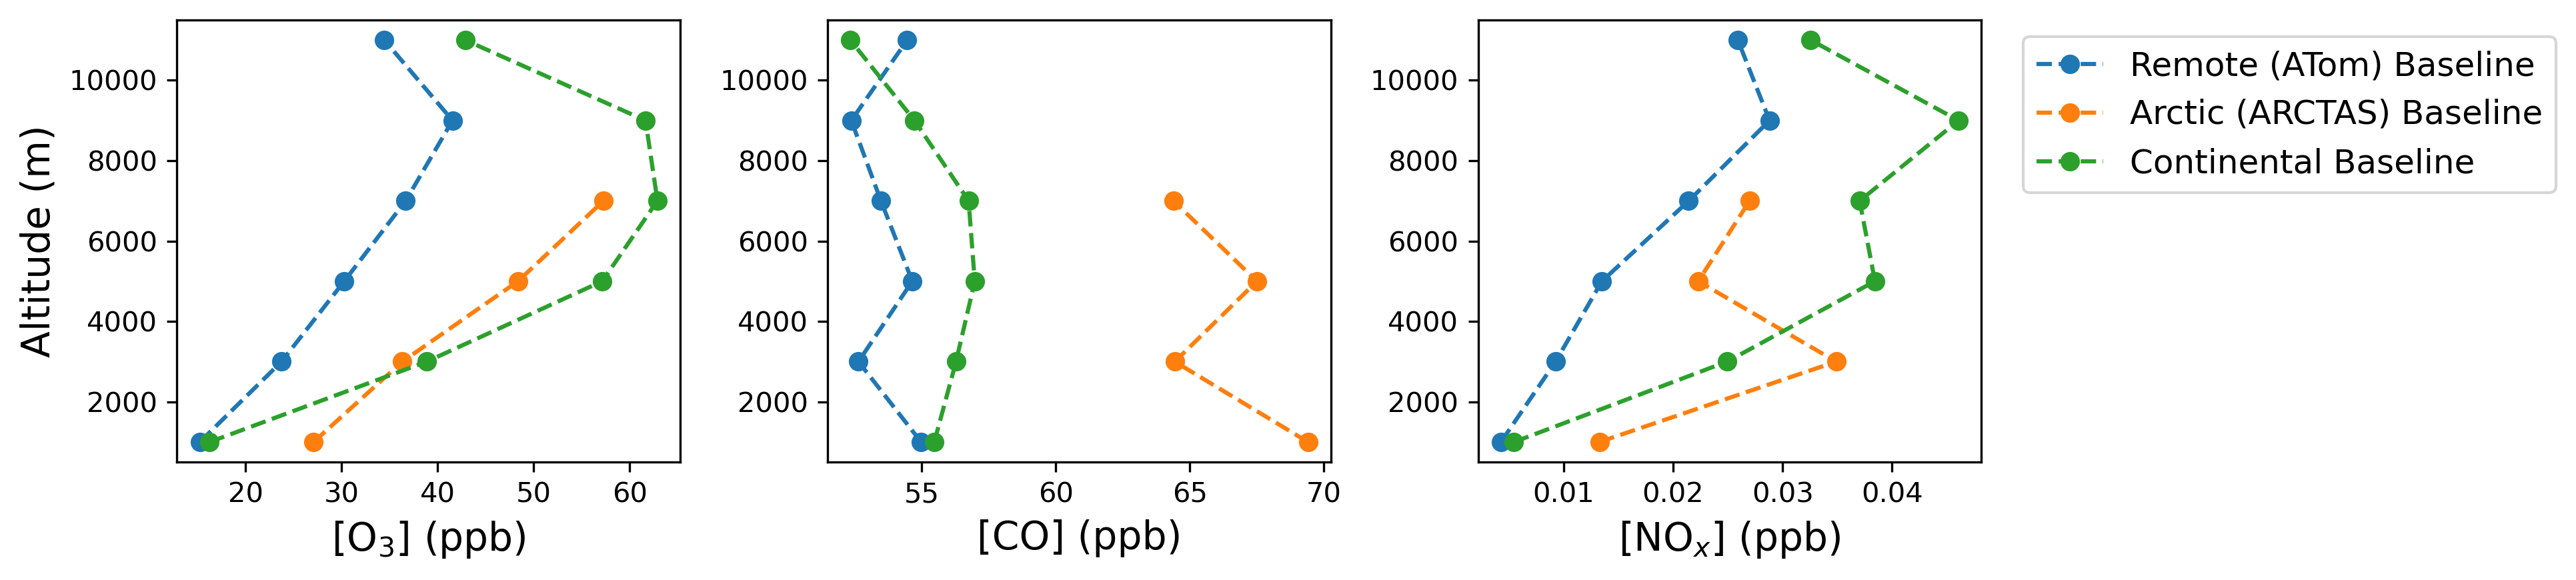

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(13,3), dpi=300)

axs = axs.flatten()
ax1, ax2, ax3, = axs

# O3 plot
ax1.errorbar(atom_model_trop_baseline['O3_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='ATom Baseline')
ax1.errorbar(arctas_model_trop_baseline['O3_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='ARCTAS Baseline') 
ax1.errorbar(other_model_trop_baseline['O3_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='Continental Baseline')
ax1.set_xlabel(r"[O$_3$] (ppb)", fontsize=14)
ax1.set_ylabel(r"Altitude (m)", fontsize=14)

# CO plot 
ax2.errorbar(atom_model_trop_baseline['CO_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='ATom Baseline')
ax2.errorbar(arctas_model_trop_baseline['CO_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='ARCTAS Baseline')
ax2.errorbar(other_model_trop_baseline['CO_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='Continental Baseline')
ax2.set_xlabel(r"[CO] (ppb)", fontsize=14)

# NOx plot
ax3.errorbar(atom_model_trop_baseline['NOx_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='Remote (ATom) Baseline')
ax3.errorbar(arctas_model_trop_baseline['NOx_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='Arctic (ARCTAS) Baseline')
ax3.errorbar(other_model_trop_baseline['NOx_baseline']*1e9, troposphere_alt_ranges, xerr=None, fmt='o--', label='Continental Baseline')
ax3.set_xlabel(r"[NO$_x$] (ppb)", fontsize=14)


# Add legend to last subplot
ax3.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('../../figures/supfig_03.pdf', dpi=300, bbox_inches='tight')
plt.show()